# TASK 2 - DENSE NETWORK USING MNIST

This network is based on the following link:
https://victorzhou.com/blog/keras-neural-network-tutorial/  
It's made using keras from tensorflow using a 3-channels model.
However, we'll be going a bit deeper, building enough classifiers to create ROC curves to each class and to each pair of classes.

In [ ]:
!pip install mnist

download data

In [ ]:
import numpy as np
import mnist
from tensorflow import keras

# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.
def import_data_mnist():
    print(' ** Importing data from mnist dataset...')
    x_data = mnist.train_images()
    y_data = mnist.train_labels()
    num_classes = len(np.unique(y_data))    

    print(x_data.shape) # (60000, 28, 28)
    print(y_data.shape) # (60000,)
    print(num_classes)

    x_test = mnist.test_images()
    y_test = mnist.test_labels()
    print(' ** Normalyzing images...')
    x_data = (x_data / 255) - 0.5
    x_test = (x_test / 255) - 0.5
    print(' ** Flattening images...')
    x_data = x_data.reshape((-1, 784))
    x_test = x_test.reshape((-1, 784))

    print(" ** Done!")
    print(x_data.shape) # (60000, 784)
    print(x_test.shape)  # (10000, 784)
    return [x_data, y_data, x_test, y_test, num_classes]

x_data, y_data, x_test, y_test, num_classes = import_data_mnist()

 ** Importing data from mnist dataset...
(60000, 28, 28)
(60000,)
10
 ** Normalyzing images...
 ** Flattening images...
 ** Done!
(60000, 784)
(10000, 784)


DEFINING SOME FUNCTIONS: Roc_Graphs, to create a graph to the ROC curve, and class_choose, which will transform the y labels into true or false labels, depending on the chosen class. This should help us on multiclass classification, in order to be able to evaluate the model's predicting ability for each class.

In [ ]:
def class_choose(y_data, y_test, x):
    y_data = (y_data == x)
    y_test = (y_test == x)
    return y_data, y_test

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_auc_score

def ROCCurveCalculate(y_test, x_test, model):

    probs = model.predict(x_test)
    probsp = probs[:, 1]
    y_new = y_test#[:, 1]
    thres = 1000

    threshold_v = np.linspace(1, 0, thres)
    tpr, fpr = ([] for i in range(2))
    
    for tt in range(0, len(threshold_v), 1):
        thresh = threshold_v[tt]
        TPscore, FPscore, TNscore, FNscore = (0 for i in range(4))
        for xz in range(0, len(probsp), 1):
            if probsp[xz] > thresh:
                if y_new[xz] == 1:                
                    TPscore = TPscore + 1
                else:
                    FPscore = FPscore + 1
            else:
                if y_new[xz] == 0:
                    TNscore = TNscore + 1
                else:
                    FNscore = FNscore + 1
        TPRate = TPscore / (TPscore + FNscore)
        FPRate = FPscore / (FPscore + TNscore)
        tpr.append(TPRate)
        fpr.append(FPRate)           

    auc2 = roc_auc_score(y_test, probsp)
    auc = metrics.auc(fpr, tpr)
    print('\n ** AUC (via metrics.auc): %s, AUC (via roc_auc_score): %s' % (auc, auc2))
    return [tpr, fpr, auc, auc2, thres]

Model creation

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 54,530
Trainable params: 54,530
Non-trainable params: 0
_________________________________________________________________


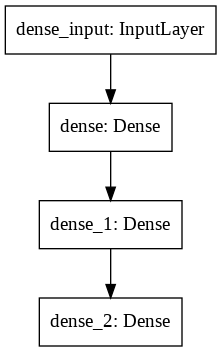

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import utils
from keras.utils import to_categorical
from IPython.display import Image, display
from keras.utils import plot_model

model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(2, activation='softmax'),
])
############COMPILANDO O MODELO.

model.summary()

plot_model(model,  to_file="model_MNIST.png")
display(Image('model_MNIST.png'))

AGORA VAMOS BOTAR PRA RODAR!

6

 ** Building model for class: 0
 ** Importing mnist dataset again for classification...
 ** Importing data from mnist dataset...
(60000, 28, 28)
(60000,)
10
 ** Normalyzing images...
 ** Flattening images...
 ** Done!
(60000, 784)
(10000, 784)
 ** Loading model for character:  0
 ** Shapes: y_data: (60000,), y_test: (10000,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 54,530
Trainable params: 54,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
938/938 [==============================] -

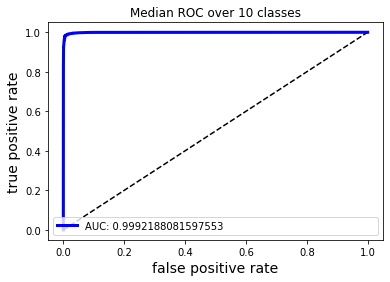

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

###TO REUSE THE INITIAL WEIGHTS - EFFECTIVELY A RESET
saved_w = model.get_weights()
print(len(saved_w))
AUCall, FPRall, TPRall = ([] for x in range(3))

for y in range(0,num_classes,1):
    print('\n ** Building model for class: %s' % y)
    print(' ** Importing mnist dataset again for classification...')
    x_data, y_data, x_test, y_test, num_classes = import_data_mnist()
    print(' ** Loading model for character: ', y)
    y_data, y_test = class_choose(y_data, y_test, y)
    print(' ** Shapes: y_data: %s, y_test: %s' % (y_data.shape, 
                                                  y_test.shape))
    model.set_weights(saved_w)
    model.compile(optimizer='adam',loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    model.fit(x_data, to_categorical(y_data), epochs=5,
              batch_size = 64)
    preds = model.predict(x_test)
    tpr, fpr, auc, auc2, thresholds = ROCCurveCalculate(y_test, x_test, model)
    auc = roc_auc_score(y_test, preds[:,1])
    AUCall.append(auc)
    FPRall.append(fpr)
    TPRall.append(tpr)

    loss, acc = model.evaluate(x_test, to_categorical(y_test))
    print('\n ** Loss = %s; Acc = %s.' % (loss,acc))

plt.figure()
plt.plot([0, 1], [0, 1], 'k--') # k = color black

mauc = np.percentile(AUCall, 50.0)
plt.title('Median ROC over %s classes' % (num_classes))
plt.xlabel('false positive rate', fontsize=14)
plt.ylabel('true positive rate', fontsize=14)

medians_x, medians_y, lowlim, highlim = ([] for i in range(4))

for num in range(0,int(thresholds),1):
    lis = [item[num] for item in TPRall]
    los = [item[num] for item in FPRall]
            
    medians_x.append(np.percentile(los, 50.0))
    medians_y.append(np.percentile(lis, 50.0))
    lowlim.append(np.percentile(lis, 15.87))
    highlim.append(np.percentile(lis, 84.13))
        
lowauc = metrics.auc(medians_x, lowlim)
highauc = metrics.auc(medians_x, highlim)

plt.plot(medians_x, medians_y, 'b', label = 'AUC: %s' % mauc, linewidth=3)  
plt.fill_between(medians_x, medians_y, lowlim, color='blue',
                 alpha=0.3, interpolate=True)
plt.fill_between(medians_x, highlim, medians_y, color='blue',
                 alpha=0.3, interpolate=True)
plt.legend(loc='lower right', ncol=1, mode="expand")

plt.savefig("ROCCurve_Full.png")